# Assignment 3: Group 11
## FlightDelays dataset 

Goal: Accurately predict whether or not a new flight will be delayed (outcome 1 = delayed and 0 = on time).  
Data: 2001 record with 5 predictors. All flights from the Washington, DC area into the New Your City area during January 2004. 


#### Variables in the dataset:

CRS_DEP_TIME: Computer Reservation Systems departure Time <br>
CARRIER: Airlines <br>
DEP_TIME: Actual Departure time <br>
DEST: Destination Airport <br>
DISTANCE: Distance travelled by flight <br>
FL_DATE: Flight date <br>
FL_NUM: Flight Number <br>
ORIGIN: Origin Airport <br>
Weather: Weather conditions <br>
DAY_WEEK: Weekdays starting from 1 to 7, 1 = Monday, 2 = Tuesday, 3 = Wednesday..., 7 = Sunday <br>
DAY_OF_MONTH: Day of a month <br>
TAIL_NUM: Tail number <br>
Flight Status: Status of the flight that is ontime or delayed. <br>

In [50]:
#Importing Libraries

import numpy as np
import math
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score , roc_curve , auc
import matplotlib.pylab as plt
from dmba import regressionSummary , classificationSummary
from dmba import liftChart , gainsChart
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

In [2]:
# Reading the dataset
flight_df = pd.read_csv("FlightDelays.csv")
flight_df.sample(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
1985,1455,OH,1455,JFK,184,1/29/2004,5935,BWI,0,4,29,N435CA,ontime
1333,630,DH,627,EWR,213,1/19/2004,7305,IAD,0,1,19,N329UE,ontime
2005,1230,DL,1230,LGA,214,1/29/2004,1752,DCA,0,4,29,N225DL,ontime
1043,1400,MQ,1400,LGA,214,1/15/2004,4966,DCA,0,4,15,N715MQ,ontime
1040,800,MQ,800,LGA,214,1/15/2004,4954,DCA,0,4,15,N738MQ,delayed
1049,630,US,627,LGA,214,1/15/2004,1479,DCA,0,4,15,N767UW,delayed
19,1830,MQ,1822,JFK,213,01/01/2004,4784,DCA,0,4,1,N707MQ,ontime
1126,1000,US,958,LGA,214,1/16/2004,2166,DCA,0,5,16,N716UW,ontime
1563,800,US,754,LGA,214,1/22/2004,2162,DCA,0,4,22,N713UW,ontime
1566,1100,US,1055,LGA,214,1/22/2004,2168,DCA,0,4,22,N708UW,ontime


In [3]:
#Displaying all columns
flight_df.columns 

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Flight Status'],
      dtype='object')

In [4]:
flight_df.dtypes

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
Weather           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM         object
Flight Status    object
dtype: object

### Target Variable - Flight Status: ontime or delayed

In [5]:
flight_df['Flight Status'].unique()

array(['ontime', 'delayed'], dtype=object)

###  A. Which variables are quantitative/numerical? Which are ordinal? Which are nominal?

From the variables listed above: <br>

#### Quantitative/Numerical Variables: <br>

CRS_DEP_TIME (Integer) <br>
DEP_TIME     (Integer) <br>
DISTANCE (Integer) <br>
FL_NUM (Integer) <br>
Weather (Integer) <br>
DAY_WEEK (Integer) <br>
DAY_OF_MONTH (Integer) <br>

#### Categorical Variables: <br>
Nominal Variables: <br>

CARRIER (String) <br>
DEST (String) <br>
FL_DATE (String) <br>
ORIGIN (String) <br>
TAIL_NUM (String) <br>
Flight Status (Boolean) <br>

In [6]:
flight_df.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [7]:
#Creating a subset dataframe with only numerical variables for statistical analysis
subset_flight_df = flight_df[["CRS_DEP_TIME", "DEP_TIME", "DISTANCE", "FL_NUM", "Weather", "DAY_WEEK", "DAY_OF_MONTH"]]  
subset_flight_df.head()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
0,1455,1455,184,5935,0,4,1
1,1640,1640,213,6155,0,4,1
2,1245,1245,229,7208,0,4,1
3,1715,1709,229,7215,0,4,1
4,1039,1035,229,7792,0,4,1


## A. Data Preprocessing
### Do some statistics on the variables

In [8]:
#Compute mean, standard deviation, min, max, median, length, and missing values for all variables

pd.DataFrame({'mean': subset_flight_df.mean(),
                'Sd': subset_flight_df.std(),
                'min': subset_flight_df.min(),
                'max': subset_flight_df.max(),
                'median': subset_flight_df.median(),
                'length': len(subset_flight_df),
                'miss.val': subset_flight_df.isnull().sum(),
                })

,mean,Sd,min,max,median,length,miss.val
CRS_DEP_TIME,1371.938664,432.697149,600,2130,1455.0,2201,0
DEP_TIME,1369.298955,442.462754,10,2330,1450.0,2201,0
DISTANCE,211.871422,13.316815,169,229,214.0,2201,0
FL_NUM,3815.086324,2409.750224,746,7924,2385.0,2201,0
Weather,0.014539,0.119725,0,1,0.0,2201,0
DAY_WEEK,3.905498,1.903149,1,7,4.0,2201,0
DAY_OF_MONTH,16.024989,8.677390,1,31,16.0,2201,0


### C. Using histogram and summary statistics

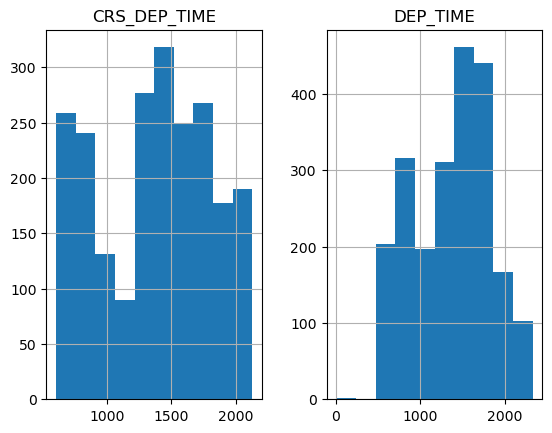

In [9]:
fig, axes = plt.subplots(1, 2)

subset_flight_df.hist('CRS_DEP_TIME', ax=axes[0])
subset_flight_df.hist('DEP_TIME', ax=axes[1])

plt.show()

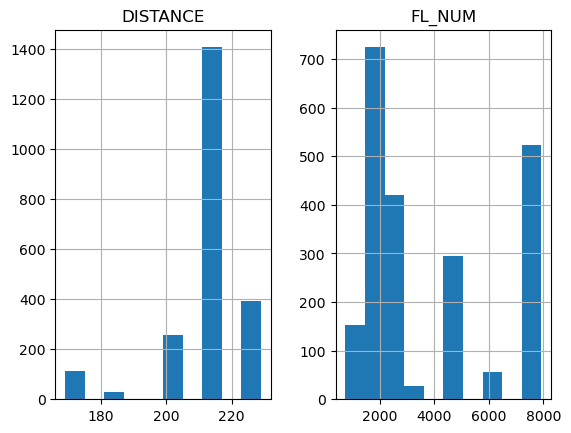

In [10]:
fig, axes = plt.subplots(1, 2)

subset_flight_df.hist('DISTANCE', ax=axes[0])
subset_flight_df.hist('FL_NUM', ax=axes[1])
plt.show()

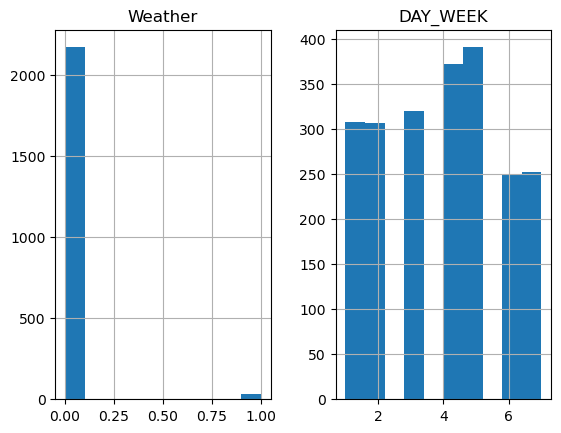

In [11]:
fig, axes = plt.subplots(1, 2)

subset_flight_df.hist('Weather', ax=axes[0])
subset_flight_df.hist('DAY_WEEK', ax=axes[1])
plt.show()

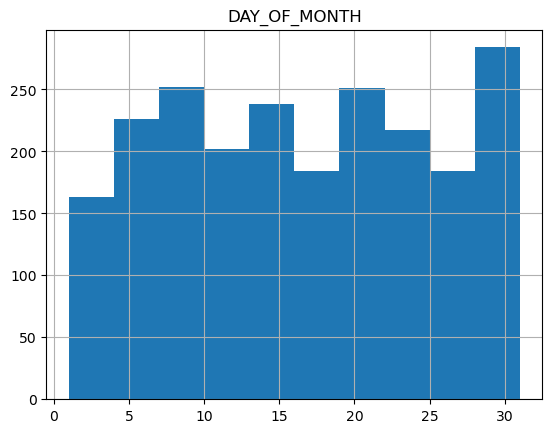

In [12]:
subset_flight_df.hist('DAY_OF_MONTH')
plt.show()

### Using different plots to compare between variables.
#### 1. What is the relation of Delay and Distance of a flight of our Dataset?

<AxesSubplot:xlabel='DISTANCE'>

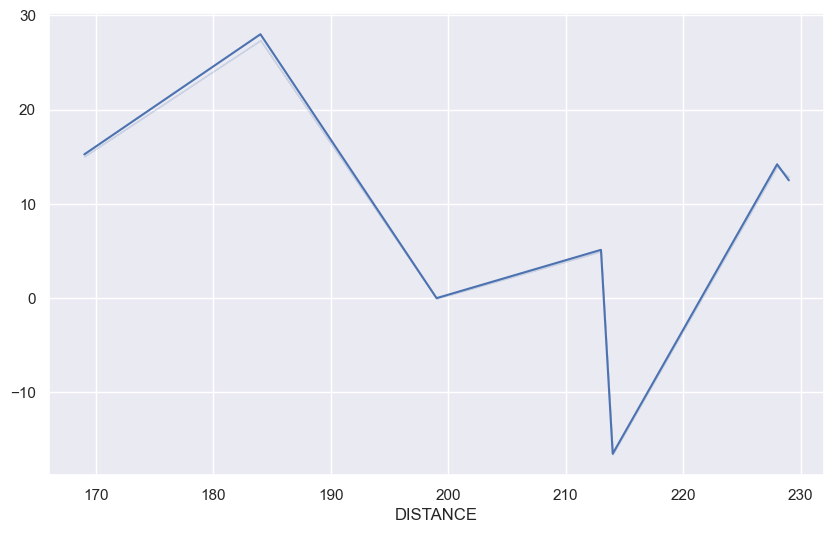

In [13]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.lineplot(x=subset_flight_df['DISTANCE'], y=(subset_flight_df['DEP_TIME'] - subset_flight_df['CRS_DEP_TIME']),ci= False)

The figure above shows the delay is higher for the flights at smaller disctance rather than the flights at longer distance.

This makes sense as generally short distance flights are generally the cheaper flights, which run a jam packed schedule which creates a threat of delay even as there is a very cool down period between each journey.

#### 2. Which day of the week witnesses the highest delay.<br>


<AxesSubplot:xlabel='DAY_WEEK'>

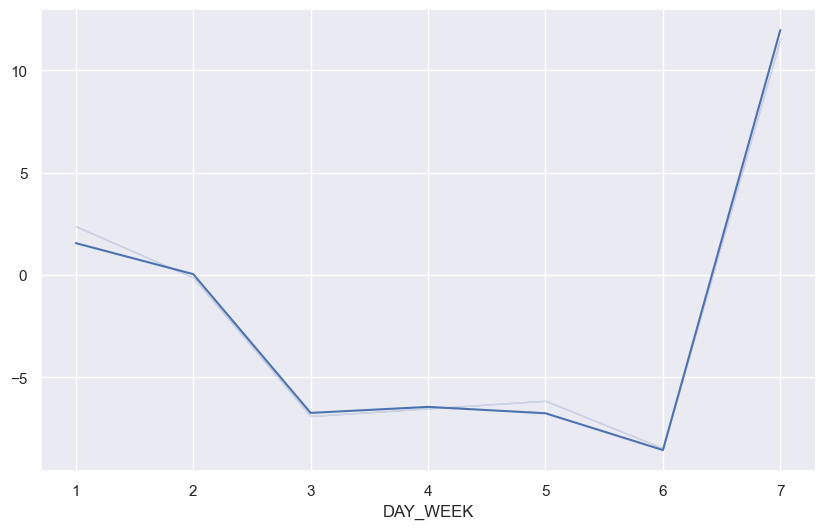

In [14]:
sns.lineplot(x=subset_flight_df['DAY_WEEK'],y=(subset_flight_df['DEP_TIME'] - subset_flight_df['CRS_DEP_TIME']),ci = False)

We can see according to our data most of the delay happens on 7th day of the week, i.e. Sunmday

### Correlation between Quantitative variables

In [15]:
# Checking correlation between variables using corr() function

subset_flight_df.corr().round(2)

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
CRS_DEP_TIME,1.00,0.98,0.06,0.09,-0.01,0.05,0.00
DEP_TIME,0.98,1.00,0.06,0.11,0.02,0.05,0.00
DISTANCE,0.06,0.06,1.00,0.42,0.03,-0.02,0.01
FL_NUM,0.09,0.11,0.42,1.00,0.04,0.02,-0.01
Weather,-0.01,0.02,0.03,0.04,1.00,-0.12,0.14
DAY_WEEK,0.05,0.05,-0.02,0.02,-0.12,1.00,0.02
DAY_OF_MONTH,0.00,0.00,0.01,-0.01,0.14,0.02,1.00


<AxesSubplot:>

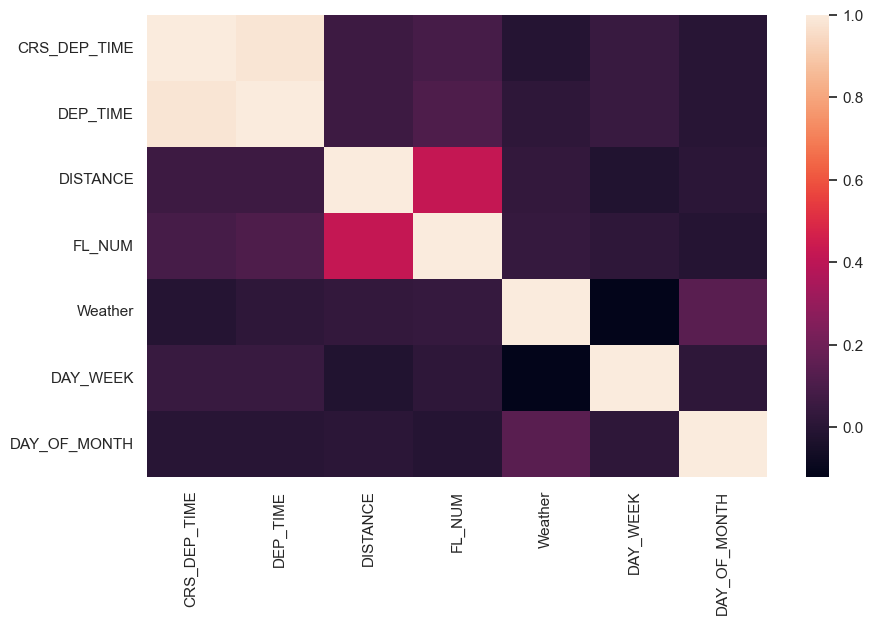

In [16]:
# Using seaborn
# Simple heatmap of correlations (without values)

import seaborn as sns 
corr = subset_flight_df.corr().round(2) 
sns.heatmap(corr)

<AxesSubplot:>

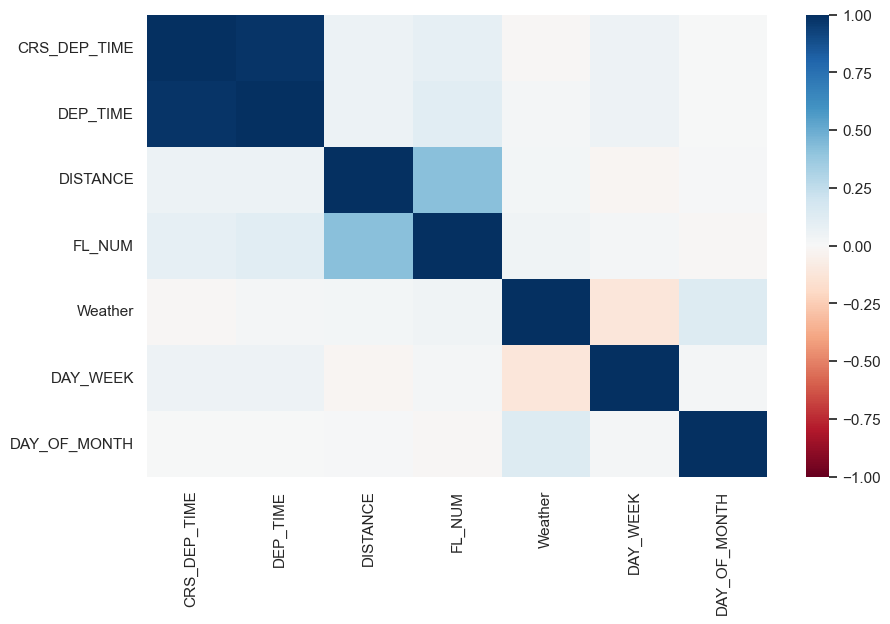

In [17]:
# Change to divergent scale and fix the range

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, 
            vmax=1, cmap="RdBu")

<AxesSubplot:>

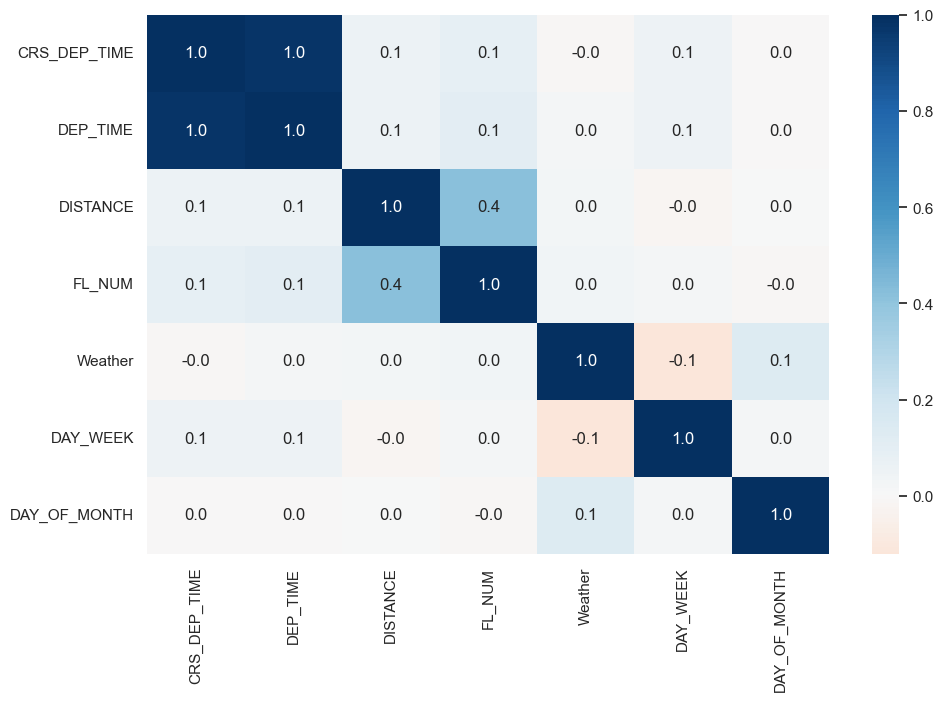

In [18]:
# Include information about values (example demonstrates how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

### Correlation between variables: 
1. 'CRS_DEP_TIME' and 'DEP_TIME' are strongly correlated with a positive correlation of 1.0 (100% correlation)

### PCA (Principle Component Analysis)

In [19]:
#Applying PCA

from sklearn.decomposition import PCA
pcs = PCA(n_components=2)
pcs.fit(subset_flight_df)

PCA(n_components=2)

In [20]:
# To explain the PCA use:
pcs.explained_variance_ratio_

array([0.9387127 , 0.06074699])

#### Removing the Correlated Variables

In [21]:
flight_df = flight_df.drop(columns=['CRS_DEP_TIME'])
flight_df.columns

Index(['CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE', 'FL_NUM',
       'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Flight Status'],
      dtype='object')

In [22]:
flight_df.shape

(2201, 12)

In [23]:
flight_df.sample(10)

,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
1301,MQ,1559,LGA,214,1/19/2004,4970,DCA,0,1,19,N841MQ,ontime
1127,US,1059,LGA,214,1/16/2004,2168,DCA,0,5,16,N723UW,ontime
1449,DL,931,LGA,214,1/21/2004,1746,DCA,0,3,21,N221DL,ontime
329,DL,1629,LGA,214,01/06/2004,1760,DCA,0,2,6,N242DL,ontime
2013,DL,2031,LGA,214,1/29/2004,1768,DCA,0,4,29,N225DL,ontime
1659,RU,1032,EWR,169,1/23/2004,2303,BWI,0,5,23,N16546,ontime
1313,US,1353,LGA,214,1/19/2004,2174,DCA,0,1,19,N736UW,ontime
287,CO,1846,EWR,199,01/05/2004,814,DCA,0,1,5,N14341,delayed
2065,RU,857,EWR,199,1/29/2004,2582,DCA,0,4,29,N14902,ontime
426,MQ,1352,LGA,214,01/07/2004,4966,DCA,0,3,7,N730MQ,ontime


In [24]:
#Split the data into training (60%) and testing (40%)

predictors = ['CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE', 'FL_NUM','ORIGIN', 'Weather', 'DAY_WEEK', 
              'DAY_OF_MONTH', 'TAIL_NUM']
outcome = 'Flight Status'

X = pd.get_dummies(flight_df[predictors],drop_first=True)
y = flight_df[outcome]
classes = ['ontime', 'delayed']


# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

In [25]:
X_train.head(10)

,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,...,TAIL_NUM_N970DL,TAIL_NUM_N973CA,TAIL_NUM_N974DL,TAIL_NUM_N975CA,TAIL_NUM_N983CA,TAIL_NUM_N986DL,TAIL_NUM_N987DL,TAIL_NUM_N994DL,TAIL_NUM_N995CA,TAIL_NUM_N997DL
1215,2110,229,7684,0,7,18,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1476,659,214,2160,0,3,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1897,858,214,2164,0,2,27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,1258,214,2172,0,5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1172,1509,213,746,0,6,17,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1720,1252,199,808,0,6,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1816,929,214,1746,0,1,26,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1544,1831,214,1764,0,4,22,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2065,857,199,2582,0,4,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,1457,214,4968,0,3,7,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train.columns

Index(['DEP_TIME', 'DISTANCE', 'FL_NUM', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH',
       'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH',
       ...
       'TAIL_NUM_N970DL', 'TAIL_NUM_N973CA', 'TAIL_NUM_N974DL',
       'TAIL_NUM_N975CA', 'TAIL_NUM_N983CA', 'TAIL_NUM_N986DL',
       'TAIL_NUM_N987DL', 'TAIL_NUM_N994DL', 'TAIL_NUM_N995CA',
       'TAIL_NUM_N997DL'],
      dtype='object', length=595)

In [27]:
X_train.shape

(1320, 595)

## B. K-Nearest Neighbors and Naive Bayes Classifier comparison
### Naive Bayes Algorithm

In [28]:
# run naive Bayes
flight_nb = MultinomialNB(alpha=0.01)
flight_nb.fit(X_train, y_train)

# predict probabilities (Shows the belonging probabilities of each record to which class)
predProb_train = flight_nb.predict_proba(X_train)
predProb_valid = flight_nb.predict_proba(X_valid)

# predict class membership (shows the class instead of probability by selecting the class with highest probability)
y_valid_pred = flight_nb.predict(X_valid)
y_train_pred = flight_nb.predict(X_train)

In [29]:
# Use the model to predict a new data

df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred})], axis=1)
df.head(10)

,actual,predicted
1276,ontime,delayed
1446,ontime,ontime
335,ontime,delayed
1458,ontime,ontime
2038,ontime,ontime
1314,ontime,ontime
389,ontime,delayed
1639,ontime,delayed
2004,ontime,ontime
403,ontime,ontime


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score on the test data
accuracy = accuracy_score(y_valid, y_valid_pred)

precision = precision_score(y_valid, y_valid_pred, average='weighted')
recall = recall_score(y_valid, y_valid_pred, average='weighted')
f1 = f1_score(y_valid, y_valid_pred, average='weighted')

In [31]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5845629965947786
Precision: 0.7189401801847995
Recall: 0.5845629965947786
F1-score: 0.6282279026455564


### K-Nearest Neigbhor (KNN ) Algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred_knn = knn.predict(X_valid)

C:\Users\sidha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
y_pred_knn

array(['ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'ontime',
       'ontime', 'ontime', 'ontime', 'delayed', 'ontime', 'ontime',
       'ontime', 'ontime', 'delayed', 'ontime', 'delayed', 'ontime',
       'ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'ontime',
       'ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'ontime',
       'ontime', 'ontime', 'ontime', 'ontime', 'delayed', 'ontime',
       'ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'ontime',
       'ontime', 'delayed', 'ontime', 'ontime', 'delayed', 'ontime',
       'ontime', 'delayed', 'delayed', 'ontime', 'ontime', 'ontime',
       'ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'delayed',
       'ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'ontime',
       'ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'ontime',
       'ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'ontime',
       'ontime', 'ontime', 'ontime', 'ontime', 'ontime', 'ontime',
       'ontime', 'ontime', 'ontime', 'ontime', 'ontim

### Accuracy Measures

Accuracy: The proportion of correctly classified samples out of the total number of samples. It is calculated as accuracy = (TP + TN) / (TP + TN + FP + FN), where TP is the number of true positives, TN is the number of true negatives, FP is the number of false positives, and FN is the number of false negatives.

Precision: The proportion of true positives out of the total number of positive predictions. It is calculated as precision = TP / (TP + FP).

Recall (Sensitivity): The proportion of true positives out of the total number of actual positive samples. It is calculated as recall = TP / (TP + FN).

F1-score: The harmonic mean of precision and recall. It is calculated as F1 = 2 * (precision * recall) / (precision + recall).

#### KNN: Confusion Matrix 

In [37]:
cm_knn = confusion_matrix(y_valid, y_pred_knn)

In [38]:
print(cm_knn)

[[ 69  98]
 [ 37 677]]


<AxesSubplot:>

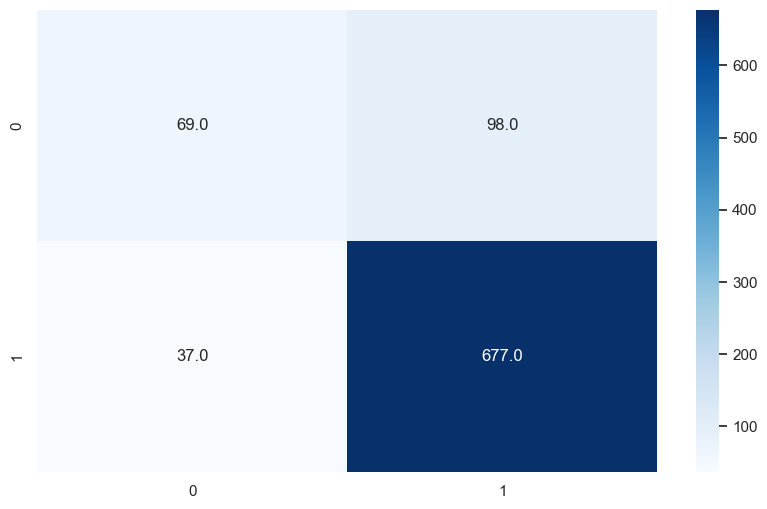

In [39]:
sns.heatmap(cm_knn,annot=True,cmap = 'Blues', fmt = '0.1f')

#### Naive Bayes: Confusion Matrix 

In [40]:
cm_nb= confusion_matrix(y_valid,y_valid_pred)

In [41]:
cm_nb

array([[ 81,  86],
       [280, 434]], dtype=int64)

<AxesSubplot:>

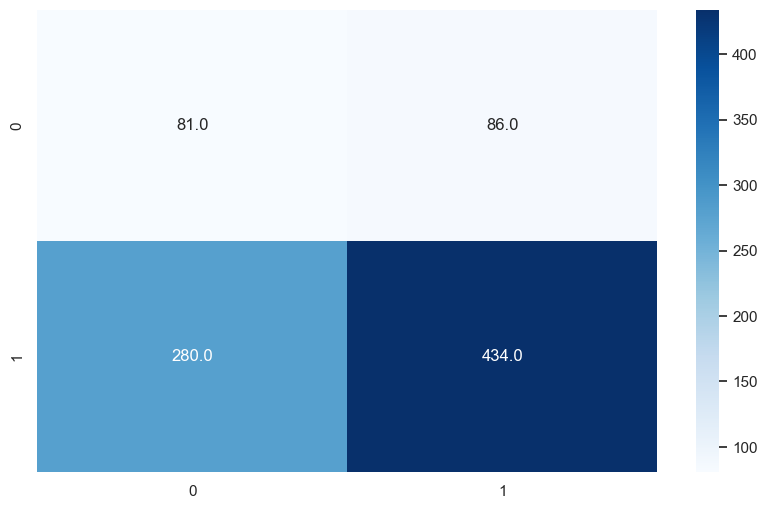

In [42]:
sns.heatmap(cm_nb,annot=True,cmap = 'Blues', fmt = '0.1f')

In [43]:
Accuracy_Knn = (69+677)/(69+98+37+677)
Precision_knn = 69/(69+37)
Recall_knn = 69/(69+98)
F1_Score_knn = 2*Precision_knn*Recall_knn/(Precision_knn+Recall_knn)

In [44]:
Accuracy_nb = (81+434)/(81+86+280+434)
Precision_nb = 81/(81+280)
Recall_nb = 81/(81+86)
F1_Score_nb = 2*Precision_nb*Recall_nb/(Precision_nb+Recall_nb)

In [45]:
acc_score = {"Parameter": ['Accuracy','Precision','Recall','F1-Score'], "Naive Bayes": [Accuracy_nb,Precision_nb,Recall_nb,F1_Score_nb], 
             "KNN": [Accuracy_Knn,Precision_knn,Recall_knn,F1_Score_knn]}

In [46]:
acc_score = pd.DataFrame(acc_score)

In [47]:
acc_score

,Parameter,Naive Bayes,KNN
0,Accuracy,0.584563,0.846765
1,Precision,0.224377,0.650943
2,Recall,0.485030,0.413174
3,F1-Score,0.306818,0.505495


### Conclusion:

We ran Naive Bayes and K-Nearest Neigbhor (KNN) algorithm on Delayed Flights dataset and predicted values for a test dataset for both. After analyzing and comparing the above accuracy measure results, we can say that KNN algorithm gives far better result than Naive Bayes model on our dataset. 

1. KNN model gives 84.68 % accurate prediction.
2. Naive Bayes model gives 58.46 % accurate prediction.

## C. Proposing extra algorithm(s)
### 1. CART Algorithm

In [55]:
# Create the decision tree classifier and fit the data
flight_dt = DecisionTreeClassifier(max_depth=5)
flight_dt.fit(X_train, y_train)

# Predict the test data using the decision tree and calculate the accuracy
y_pred_dt = dt.predict(X_valid)
accuracy_dt = accuracy_score(y_valid, y_pred_dt)
print("Decision Tree Accuracy: ", accuracy_dt)

Decision Tree Accuracy:  0.8229284903518729


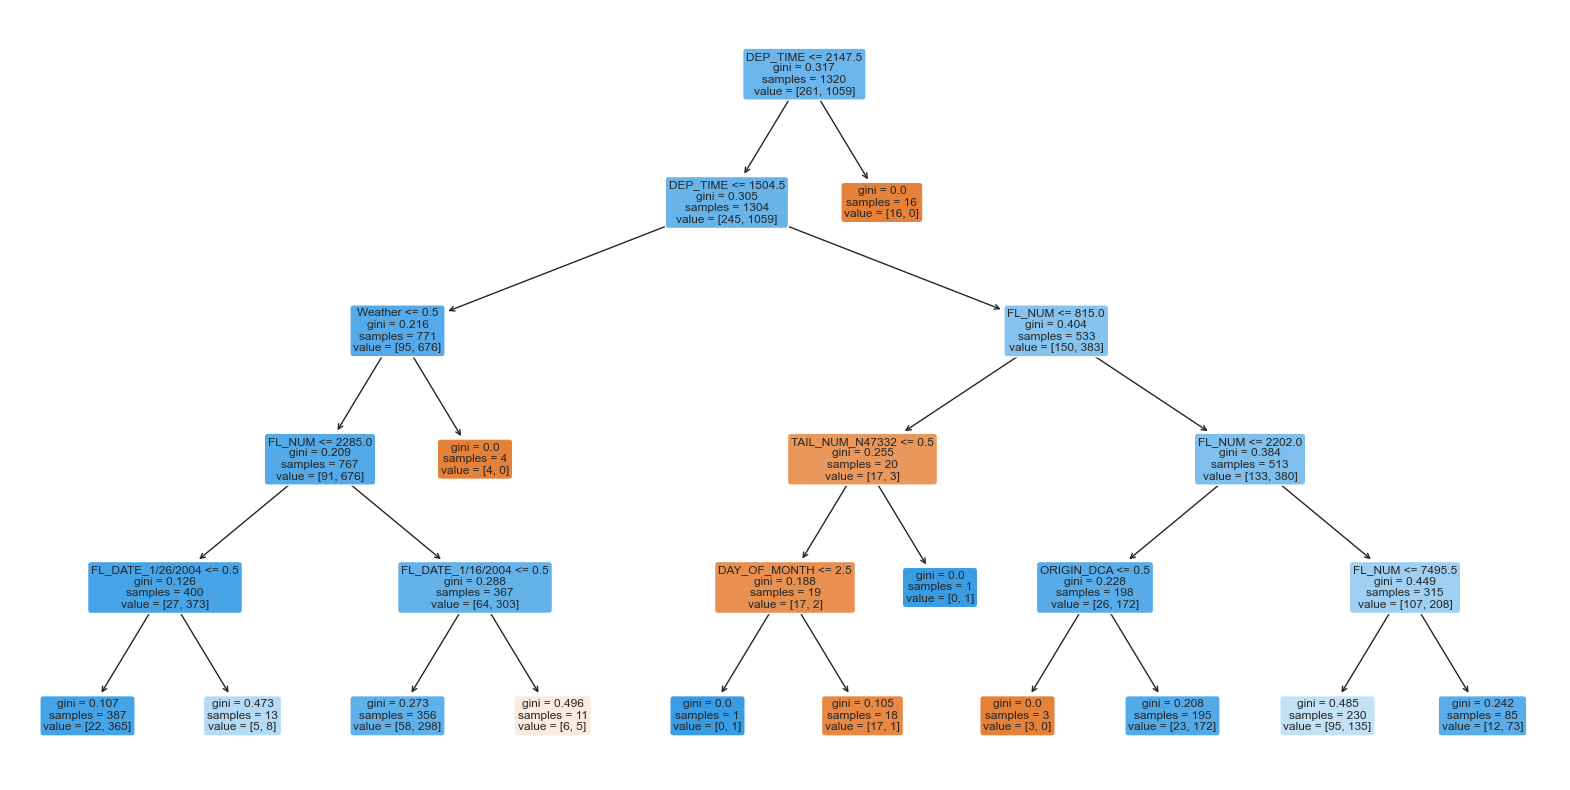

'decision_tree.png'

In [56]:
# Fit a decision tree model
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, rounded=True, feature_names=X_train.columns)
plt.show()


# Generate Graphviz format file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['ontime', 'delayed'],
                           filled=True, rounded=True,
                           special_characters=True)
# Convert Graphviz format to image format
graph = graphviz.Source(dot_data)
graph.format = 'png'

# Save the image to a file
graph.render('decision_tree')

### 2. Logistic Regression

In [57]:
# Create the logistic regression classifier and fit the data
flight_lr = LogisticRegression()
flight_lr.fit(X_train, y_train)

# Predict the test data using logistic regression and calculate the accuracy
y_pred_lr = lr.predict(X_valid)
accuracy_lr = accuracy_score(y_valid, y_pred_lr)
print("Logistic Regression Accuracy: ", accuracy_lr)

Logistic Regression Accuracy:  0.8195232690124858


C:\Users\sidha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Result:

After comparing the all above algorithms on the FlightDelay dataset, we can conclude that KNN is best fit model with highest accuracy. <br>
1. KNN model gives 84.68 % accurate prediction.
2. Naive Bayes model gives 58.46 % accurate prediction.
3. CART model gives 82.29 % accurate prediction.
4. Logistic Regresion model gives 81.95 % accurate prediction.